In [1]:
#%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 8]
import pathlib
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

from algorithms import pca_algo, kmeans_algo, nmf_algo, tsne_algo
from val_sort import sort_clusterlabels, name_change, plot2d, plot3d, hyperparameter_testing

In [3]:
path = pathlib.WindowsPath('C:\Python\Projects\crystal-phase-prediction\data\pkl_files\descriptors\df_prdf_hfo2.pkl')
df = pd.read_pickle(path)
df

structure  \
0     [[1.38867986 2.3864784  4.36482979] Hf, [3.587...   
1     [[1.40181386 2.3944349  4.3885007 ] Hf, [3.606...   
2     [[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...   
3     [[-8.73105937  2.58337834  3.5977214 ] Hf, [-6...   
4     [[1.37820795 2.39009891 4.37039843] Hf, [3.622...   
...                                                 ...   
1720  [[ 1.26076304 -5.11876687  1.26075093] Hf, [ 1...   
1721  [[  1.2262443  -10.12402918  -3.43749088] Hf, ...   
1722  [[1.39997305 0.20795941 1.85144277] Hf, [1.451...   
1723  [[-8.97250742 -0.20890362  1.50328354] Hf, [-8...   
1724  [[1.26076659 9.90848891 1.27892142] Hf, [1.260...   

                                name  Hf-Hf PRDF r=0.00-0.50  \
0        Ag_HfO2_cat_3.125_222_m.cif                     0.0   
1        Ag_HfO2_cat_3.125_222_o.cif                     0.0   
2      Ag_HfO2_cat_3.125_222_p-o.cif                     0.0   
3        Ag_HfO2_cat_3.125_222_t.cif                     0.0   
4         Ag_HfO2_cat_6.25_122_m.cif                     0.0   
...                              ...                     ...   
1720    Zr_HfO2_inter_6.25_212_t.cif                     0.0   
1721    Zr_HfO2_inter_6.25_221_m.cif                     0.0   
1722    Zr_HfO2_inter_6.25_221_o.cif                     0.0   
1723  Zr_HfO2_inter_6.25_221_p-o.cif                     0.0   
1724    Zr_HfO2_inter_6.25_221_t.cif                     0.0   

      Hf-Hf PRDF r=0.50-1.00  Hf-Hf PRDF r=1.00-1.50  Hf-Hf PRDF r=1.50-2.00  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   
...                      ...                     ...                     ...   
1720                     0.0                     0.0                     0.0   
1721                     0.0                     0.0                     0.0   
1722                     0.0                     0.0                     0.0   
1723                     0.0                     0.0                     0.0   
1724                     0.0                     0.0                     0.0   

      Hf-Hf PRDF r=2.00-2.50  Hf-Hf PRDF r=2.50-3.00  Hf-Hf PRDF r=3.00-3.50  \
0                        0.0                     0.0                0.092170   
1                        0.0                     0.0                0.100902   
2                        0.0                     0.0                0.086349   
3                        0.0                     0.0                0.011643   
4                        0.0                     0.0                0.090230   
...                      ...                     ...                     ...   
1720                     0.0                     0.0                0.030077   
1721                     0.0                     0.0                0.082710   
1722                     0.0                     0.0                0.086470   
1723                     0.0                     0.0                0.056393   
1724                     0.0                     0.0                0.030077   

      Hf-Hf PRDF r=3.50-4.00  ...  O-O PRDF r=15.00-15.50  \
0                   0.047391  ...                0.055107   
1                   0.043016  ...                0.064922   
2                   0.066347  ...                0.062933   
3                   0.122488  ...                0.069220   
4                   0.045204  ...                0.055043   
...                      ...  ...                     ...   
1720                0.113009  ...                0.066034   
1721                0.040966  ...                0.057523   
1722                0.038141  ...                0.061073   
1723                0.088995  ...   

In [5]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data\data_labels\labels_hfo2.pkl')
labels_true = labels_true.labels_0_4
labels_true = labels_true.values


In [6]:
X = df.iloc[:,2:]

In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        , 0.        , 0.        , ..., 0.71163683, 0.11555312,
        0.82183908],
       [0.        , 0.        , 0.        , ..., 0.43030691, 0.81106243,
        0.54238506],
       [0.        , 0.        , 0.        , ..., 0.82608696, 0.60843373,
        0.60201149],
       ...,
       [0.        , 0.        , 0.        , ..., 0.69309463, 0.60569551,
        0.39511494],
       [0.        , 0.        , 0.        , ..., 0.65089514, 0.80613363,
        0.30603448],
       [0.        , 0.        , 0.        , ..., 0.2544757 , 0.59912377,
        0.68678161]])

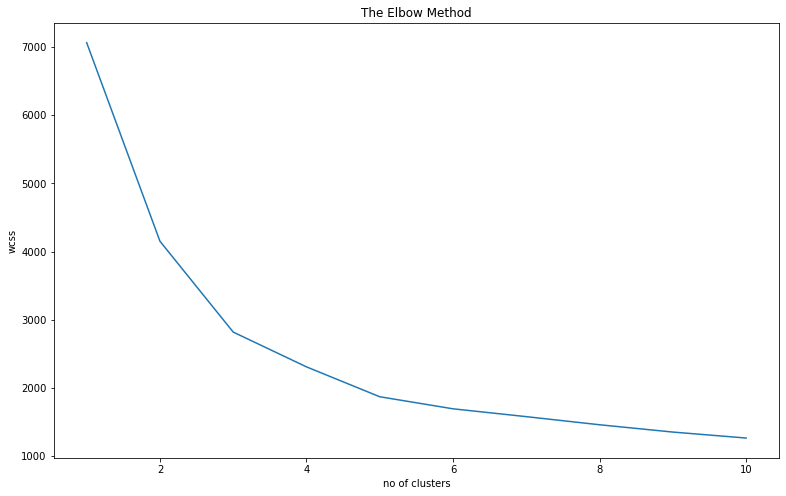

In [8]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [9]:
# PCA Testing

[50.9 65.4 73.8 79.9 83.9 86.8 88.3 89.4 90.4 91.2 91.9 92.5 93.  93.5
 93.9 94.3 94.7 95.1 95.4 95.7 96.  96.3 96.5 96.7 96.9 97.1 97.3 97.5
 97.7 97.8 97.9 98.  98.1 98.2 98.3 98.4 98.5 98.6 98.7 98.8 98.9 99.
 99.1 99.2 99.3 99.4 99.5 99.6 99.6 99.6]


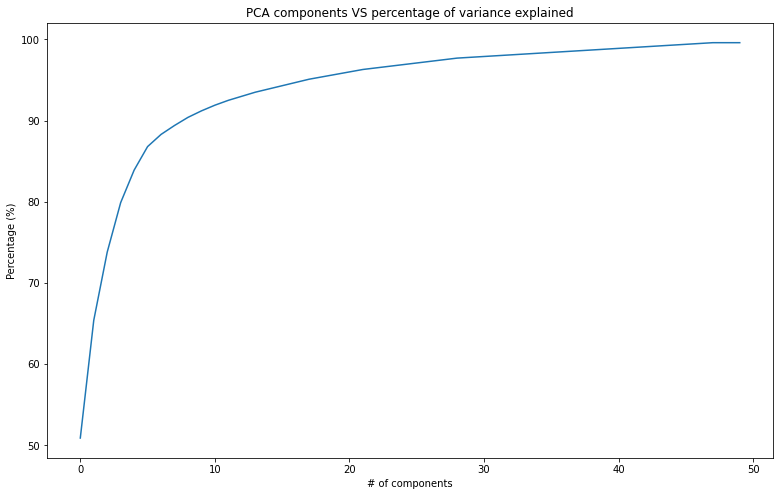

In [10]:
mPCA = PCA(n_components=50)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
print(variance_ratio)
plt.title("PCA components VS percentage of variance explained")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [11]:
comp = 30 # change principal components

dfpca = pca_algo(X, comp)
dfpca_kmeans = kmeans_algo(dfpca, 5)

In [12]:
metrics.silhouette_score(dfpca.iloc[:,:-1], dfpca_kmeans['cluster'], metric='l2')

0.42918075877514344

In [13]:
dfpca_kmeans['labels'] = labels_true

In [14]:
dfpca_kmeans3 = name_change(dfpca_kmeans)

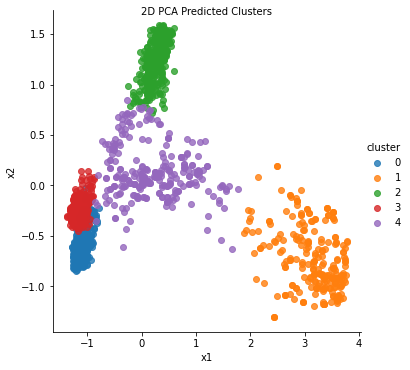

In [15]:
plot2d(dfpca_kmeans3, "2D PCA Predicted Clusters", 'cluster')

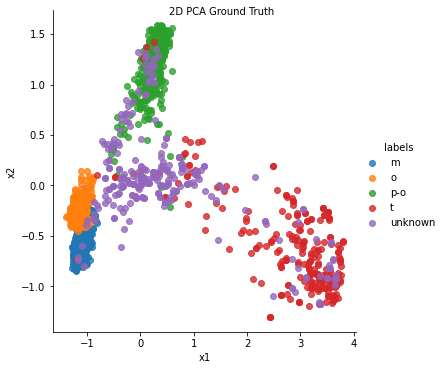

In [16]:
plot2d(dfpca_kmeans3, "2D PCA Ground Truth", 'labels')

In [17]:
plot3d(dfpca_kmeans3, "3D PCA Ground Truth", 'labels')

In [18]:
plot3d(dfpca_kmeans3, "3D PCA Prediction", 'cluster')

In [19]:
dfpca_kmeans = sort_clusterlabels(dfpca_kmeans)
acc = accuracy_score(dfpca_kmeans['labels'], dfpca_kmeans['cluster'])
print(acc)

0.9159420289855073


In [20]:
confusion_matrix(dfpca_kmeans['labels'], dfpca_kmeans['cluster'])

array([[460,   0,   0,   0,   0],
       [  1, 204,   3,   0,  37],
       [  0,   0, 367,   0,  37],
       [  0,   0,   0, 345,   0],
       [  9,  36,  22,   0, 204]], dtype=int64)

In [21]:
comp = list(range(1, 40 , 1)) # here pca comp
hyperparameter_testing(X, 'pca', comp, labels_true)

Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19
Round: 20
Round: 21
Round: 22
Round: 23
Round: 24
Round: 25
Round: 26
Round: 27
Round: 28
Round: 29
Round: 30
Round: 31
Round: 32
Round: 33
Round: 34
Round: 35
Round: 36
Round: 37
Round: 38
Round: 39
Best value of performance: 0.9159420289855073 Hyperparameter = 5
Overview: {1: 0.8284057971014492, 2: 0.8742028985507246, 3: 0.9008695652173913, 4: 0.903768115942029, 5: 0.9159420289855073, 6: 0.9153623188405797, 7: 0.9159420289855073, 8: 0.9159420289855073, 9: 0.9159420289855073, 10: 0.9159420289855073, 11: 0.9153623188405797, 12: 0.9159420289855073, 13: 0.9159420289855073, 14: 0.9159420289855073, 15: 0.9159420289855073, 16: 0.9159420289855073, 17: 0.9159420289855073, 18: 0.9159420289855073, 19: 0.9159420289855073, 20: 0.9159420289855073, 21: 0.9159420289855073, 22: 0.9159420289855073, 23: 0.9159420289855073, 2

In [22]:
# TSNE Testing

In [24]:
perplex = 20 # change value here

dftsne = tsne_algo(X, perplex)
dftsne_kmeans = kmeans_algo(dftsne[[0, 1, 2]], n_clusters = 5)

In [25]:
dftsne_kmeans['labels'] = labels_true

In [26]:
metrics.silhouette_score(dftsne, dftsne_kmeans['cluster'], metric='l2')

0.44970518

In [27]:
dftsne_kmeans3 = name_change(dftsne_kmeans)

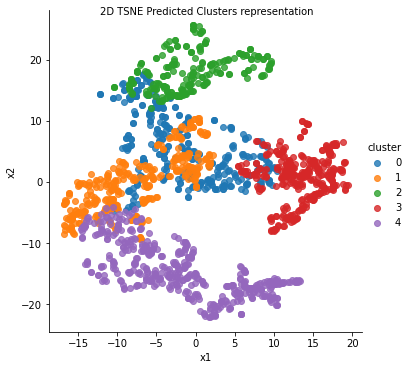

In [28]:
plot2d(dftsne_kmeans3,"2D TSNE Predicted Clusters representation",'cluster')

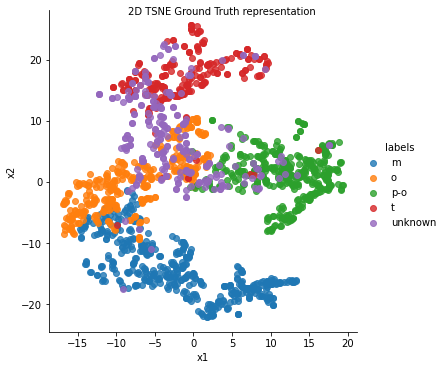

In [29]:
plot2d(dftsne_kmeans3,"2D TSNE Ground Truth representation",'labels')

In [30]:
plot3d(dftsne_kmeans3, 'TSNE 3D Ground Truth', 'labels')

In [31]:
plot3d(dftsne_kmeans3, 'TSNE 3D Prediction', 'cluster')

In [32]:
dftsne_kmeans = sort_clusterlabels(dftsne_kmeans)
acc = accuracy_score(dftsne_kmeans['labels'], dftsne_kmeans['cluster'])
print(acc)

0.88


In [33]:
confusion_matrix(dftsne_kmeans['labels'], dftsne_kmeans['cluster'])

array([[217,   0,  34,  16,   4],
       [  0, 345,   0,   0,   0],
       [ 39,   0, 202,   3,   1],
       [ 93,   0,   0, 311,   0],
       [ 17,   0,   0,   0, 443]], dtype=int64)

In [34]:
#Hyperparameter Testing TSNE

In [ ]:
perplexity = list(range(20, 25, 1))
hyperparameter_testing(X,'tsne', perplexity, labels_true)

Round: 1
Round: 2
Round: 3
Round: 4


In [ ]:
# NMF Testing 

In [ ]:
component = 8
W_df = nmf_algo(X, component)
W_df_kmeans = kmeans_algo(W_df, 5) # calculate clusterlabels and asign labels to W_df_kmeans 

In [ ]:
W_df_kmeans['labels'] = labels_true

In [ ]:
metrics.silhouette_score(W_df.iloc[:,:-1], W_df_kmeans['cluster'], metric='l2')

In [ ]:
# change names for plotly bib
W_df_kmeans3 = name_change(W_df_kmeans)

In [ ]:
plot3d(W_df_kmeans3,title='NMF 3D Prediction Kmeans', clus_lab = 'cluster' )

In [ ]:
plot3d(W_df_kmeans3,title='NMF 3D Ground Truth', clus_lab = 'labels' )

In [ ]:
W_df_kmeans = sort_clusterlabels(W_df_kmeans)
acc = accuracy_score(W_df_kmeans['labels'], W_df_kmeans['cluster'])
print(acc)

In [ ]:
confusion_matrix(W_df_kmeans['labels'], W_df_kmeans['cluster'])

In [ ]:
# Hyperparameter components testing

In [ ]:
components = list(range(2, 10 , 2))
hyperparameter_testing(X,'nmf', components, labels_true)

In [ ]:
# Testing Alternative Algorithm Methodes OPTICS/DBSCAN

In [ ]:
component = 8
W_df = nmf_algo(X, component)
optics = OPTICS(min_samples=60).fit(W_df)
W_df['cluster'] = optics.labels_
W_df['labels'] = labels_true

In [ ]:
W_df = name_change(W_df)
plot3d(W_df, title='optics 3D Prediction', clus_lab = 'cluster')

In [ ]:
min_samples =list(range(20:30))
hyperparameter_testing(X,'nmf', min_samples, labels_true)